In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [147]:
N = 5
d = 2 
C = 4

X = np.random.randn(d, N)
y = np.random.randint(0,4,(N))

In [148]:
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def softmax_stable(Z):
    b = np.max(Z)
    return np.exp(Z - b)/sum(np.exp(Z -b))

In [149]:
def convert_label(y, C=C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))). toarray()
    return Y
Y = convert_label(y,C)
def cost(X,Y,W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))
W_init = np.random.randn(d, C)

def grad(X,Y,W):
    A = softmax(W.T.dot(X))
    E = A - Y
    return X.dot(E.T)

def numerical_grad(X,Y,W):
    eps = 1e-6
    g = np.zeros_like(W)
    
    for i in range (W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            
            W_p[i,j] += eps
            W_n[i,j] -= eps
            
            g[i,j]= (cost(X,Y,W_p)- cost(X,Y,W_n))/(2*eps)
            
    return g

g1 = grad(X,Y,W_init)
g2 = numerical_grad(X,Y,W_init)

print(np.linalg.norm(g1 - g2))

1.090066092324065e-09


In [150]:

def softmax_regression(X,y,W_init, eta, tol=1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_label(y, C)
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count<max_count:
        
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape( d, 1)
            yi = Y[:, i].reshape( C, 1)
            ai = softmax(np.dot(W[-1].T,xi))
            W_new = W[-1] + eta*xi.dot((yi -ai).T)
            count += 1
            
            if count%check_w_after ==0 :
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05
d = X.shape[0]
W_init = np.random.randn(d,C)
W = softmax_regression(X,y,W_init, eta)

In [151]:
def predict(W,X):
    A = softmax_stable(W.T.dot((X)))

    return np.argmax(A, axis  = 0)


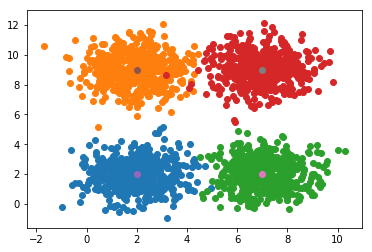

In [152]:
means = np.array([[2,2,2,2,2], [2,9,2,9,2], [7,2,7,2,7], [7,9,7,9,7]])
cov = np.identity(5)
N =500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0, X1, X2, X3),axis = 0).T

X = np.concatenate((np.ones((1,4*N)), X), axis = 0 )
C = 4
#
original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T
#
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.scatter(X3[:,0], X3[:,1])

#
plt.scatter(means[0,0], means[0,1])
plt.scatter(means[1,0], means[1,1])
plt.scatter(means[2,0], means[2,1])
plt.scatter(means[3,0], means[3,1])
#


In [153]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print (W[-1])

[[ 7.03238684 -1.68233424 -1.67017136 -3.46692113]
 [-1.19820982 -3.02121842 -0.44521536 -0.68916114]
 [-1.2405551   0.64082824 -2.23913775 -0.66416023]
 [ 0.57631173 -1.15677543  1.59176363  0.57812839]
 [-0.75957598  1.09250877 -1.84320748 -0.22401385]
 [ 0.97478673 -0.62832512  2.11576745  1.57636949]]


In [157]:
x1m = np.arange(-2,11,0.5)
lenx1 = len(x1m)
x2m = np.arange(-3,10,0.5)
lenx2 = len(x2m)
x3m = np.arange(-4,9,0.5)
lenx3 = len(x3m)
x4m = np.arange(-5,8,0.5)
lenx4 = len(x4m)
x5m = np.arange(-6,7,0.5)
lenx5 = len(x5m)

xx1,xx2,xx3,xx4,xx5 = np.meshgrid(x1m,x2m,x3m,x4m,x5m)

xx_1 = xx1.ravel().reshape(1, xx1.size)
xx_2 = xx2.ravel().reshape(1, xx2.size)
xx_3 = xx3.ravel().reshape(1, xx3.size)
xx_4 = xx4.ravel().reshape(1, xx4.size)
xx_5 = xx5.ravel().reshape(1, xx5.size)

XX = np.concatenate((np.ones((1, xx1.size)), xx_1, xx_2, xx_3, xx_4, xx_5), axis = 0)
print(XX.shape)

Z = predict(W[-1], XX)

print(Z)
np.shape(Z)

(6, 11881376)
[0 0 0 ... 3 3 3]


(11881376,)

[[[[[0 0 0 ... 2 2 2]
    [0 0 0 ... 0 2 2]
    [0 0 0 ... 0 0 2]
    ...
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 1 0 0]
    [1 1 1 ... 1 1 0]]

   [[0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 0 2 2]
    ...
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 1 0 0]]

   [[0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    ...
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 0 0 0]]

   ...

   [[0 0 2 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    ...
    [0 0 0 ... 0 2 2]
    [0 0 0 ... 0 0 2]
    [0 0 0 ... 0 0 0]]

   [[0 2 2 ... 2 2 2]
    [0 0 2 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    ...
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 0 2 2]
    [0 0 0 ... 0 0 2]]

   [[0 2 2 ... 2 2 2]
    [0 2 2 ... 2 2 2]
    [0 0 2 ... 2 2 2]
    ...
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 0 2 2]]]


  [[[0 0 0 ... 2 2 2]
    [0 0 0 ... 2 2 2]
    [0 0 0 ... 0 2 2]
    ...
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 0 0 0]
    [1 1 1 ... 1 0 0

TypeError: Input z must be a 2D array.

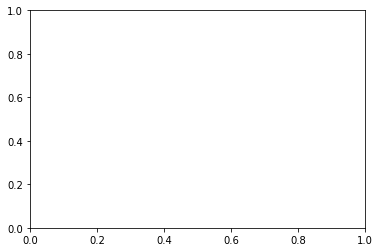

In [159]:
Z = Z.reshape(xx1.shape)
print(Z)
CS = plt.contourf(xx1,xx2, Z, 200, cmap='jet', alpha =.1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()